# Data Science Mini Project

## Problem Statement and Overview

In the context of rising global energy demands and the urgent need for sustainable practices, it is critical to project the trajectory of renewable energy integration into the global energy matrix.

This project aims to predict the share of renewable energy sources in global energy consumption by the year 2047. By analyzing historical data from various renewable sectors and extrapolating current trends, we seek to forecast the extent of renewable energy penetration. Thorugh this project we aim to answer the question: **"Will the production share (%) of renewable sources keep up with the increasing global energy consumptions by the year 2047?"**

This projection will help policymakers, industry leaders, and environmental stakeholders to strategize for a future that aligns with environmental sustainability and energy security.

## Importing Essential Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="white")
from statsmodels.tsa import seasonal

## Loading Datasets

In [2]:
continent_consumption = pd.read_csv('Continent_Consumption_TWH.csv')
country_consumption = pd.read_csv('Country_Consumption_TWH (1).csv')
nonrenewable_power_gen = pd.read_csv('nonRenewablesTotalPowerGeneration.csv')
renewable_power_gen = pd.read_csv('renewablePowerGeneration97-17 (1).csv')
renewable_total = pd.read_csv('renewablesTotalPowerGeneration.csv')
top20 = pd.read_csv('top20CountriesPowerGeneration.csv')

In [3]:
continent_consumption.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [4]:
country_consumption.head()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
0,1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1,1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
2,1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
3,1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
4,1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


In [5]:
nonrenewable_power_gen.head()

,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04


In [6]:
renewable_power_gen.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


In [7]:
renewable_total.head()

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04


In [8]:
top20.head()

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.02,79.43,0.125,1819.940
1,USA,315.62,277.91,58.95,18.960,758.619
2,Brazil,370.90,42.37,52.25,0.000,466.350
3,Canada,383.48,29.65,7.12,0.000,424.090
4,India,141.80,51.06,43.76,0.000,262.650


## Data Cleaning and Preprocessing

**Checking for Null Values**

In [9]:
# Check for missing values
for name, df in [('continent_consumption', continent_consumption), 
                 ('country_consumption', country_consumption),
                 ('nonrenewable_power_gen', nonrenewable_power_gen), 
                 ('renewable_power_gen', renewable_power_gen),
                 ('renewable_total', renewable_total),
                 ('top20', top20)]:
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

Missing values in continent_consumption:
Year             0
World            0
OECD             0
BRICS            0
Europe           0
North America    0
Latin America    0
Asia             0
Pacific          0
Africa           0
Middle-East      0
CIS              0
dtype: int64


Missing values in country_consumption:
Year                    2
China                   2
United States           2
Brazil                  2
Belgium                 2
Czechia                 2
France                  2
Germany                 2
Italy                   2
Netherlands             2
Poland                  2
Portugal                2
Romania                 2
Spain                   2
Sweden                  2
United Kingdom          2
Norway                  2
Turkey                  2
Kazakhstan              2
Russia                  2
Ukraine                 2
Uzbekistan              2
Argentina               2
Canada                  2
Chile                   2
Colombia                2
M

**Dropping Null values**

In [10]:
country_consumption.dropna(inplace = True)
print(country_consumption.isnull().sum())

Year                    0
China                   0
United States           0
Brazil                  0
Belgium                 0
Czechia                 0
France                  0
Germany                 0
Italy                   0
Netherlands             0
Poland                  0
Portugal                0
Romania                 0
Spain                   0
Sweden                  0
United Kingdom          0
Norway                  0
Turkey                  0
Kazakhstan              0
Russia                  0
Ukraine                 0
Uzbekistan              0
Argentina               0
Canada                  0
Chile                   0
Colombia                0
Mexico                  0
Venezuela               0
Indonesia               0
Japan                   0
Malaysia                0
South Korea             0
Taiwan                  0
Thailand                0
India                   0
Australia               0
New Zealand             0
Algeria                 0
Egypt       

**Studying the data**

In [11]:
print("Continent Consumption:")
print(continent_consumption.info())

print("\nCountry Consumption:")
print(country_consumption.info())

print("\nTotal Power Generation (Non-Renewables):")
print(nonrenewable_power_gen.info())

print("\nRenewable Power Generation ('97-'17):")
print(renewable_power_gen.info())

print("\nRenewable Total Power Generation:")
print(renewable_total.info())

print("\nTop 20 Countries Power Generation:")
print(top20.info())

Continent Consumption:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   World          31 non-null     float64
 2   OECD           31 non-null     float64
 3   BRICS          31 non-null     float64
 4   Europe         31 non-null     float64
 5   North America  31 non-null     float64
 6   Latin America  31 non-null     float64
 7   Asia           31 non-null     float64
 8   Pacific        31 non-null     float64
 9   Africa         31 non-null     float64
 10  Middle-East    31 non-null     float64
 11  CIS            31 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.0 KB
None

Country Consumption:
<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 30
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                ----

**Creating DataFrame for continent consumption, dropping other alliances**

In [12]:
cont = continent_consumption[['Year','Asia','Europe','North America','Latin America','Africa','Pacific']]

**Extracting the year column for the x-axis**

In [13]:
years = country_consumption['Year']

**Extracting data for the year 2020 and Sorting the data to find the top consumers**

In [14]:
data_2020 = country_consumption[country_consumption['Year'] == 2020].drop('Year', axis=1).transpose()
data_2020.columns = ['Consumption'] 
data_2020.sort_values(by='Consumption', ascending=False, inplace = True)

**Adding a column for total renewable energy production**

In [16]:
renewable_power_gen["Total (TWh)"] = (renewable_power_gen["Hydro(TWh)"]+renewable_power_gen["Biofuel(TWh)"]+
                                    renewable_power_gen["Solar PV (TWh)"]+renewable_power_gen["Geothermal (TWh)"])

# Exploratory Data Analysis

**Finding statistics for each column of each Dataframe**

In [17]:
# Descriptive statistics for each DataFrame
print("Continent Consumption:")
print(continent_consumption.describe())

print("\nCountry Consumption:")
print(country_consumption.describe())

print("\nTotal Power Generation (Non-Renewables):")
print(nonrenewable_power_gen.describe())

print("\nRenewable Power Generation ('97-'17):")
print(renewable_power_gen.describe())

print("\nRenewable Total Power Generation:")
print(renewable_total.describe())

print("\nTop 20 Countries Power Generation:")
print(top20.describe())


Continent Consumption:
              Year          World          OECD         BRICS        Europe  \
count    31.000000      31.000000     31.000000     31.000000     31.000000   
mean   2005.000000  132792.465484  60396.465806  41128.932258  21487.738065   
std       9.092121   22724.116555   3480.622930  13849.968002    899.171139   
min    1990.000000  101855.540000  52602.490000  25993.050000  19643.070000   
25%    1997.500000  111176.985000  58719.870000  27504.950000  20875.850000   
50%    2005.000000  133582.180000  61545.960000  38169.660000  21480.610000   
75%    2012.500000  154853.450000  62360.060000  55521.620000  21951.625000   
max    2020.000000  167553.410000  64883.770000  63255.570000  23108.810000   

       North America  Latin America          Asia      Pacific       Africa  \
count      31.000000      31.000000     31.000000    31.000000    31.000000   
mean    28226.760323    7897.145161  45402.019355  1563.297097  6851.945806   
std      1548.243608    1537

## Energy Consumption

**Energy Consumed Globally from 1990 to 2020**

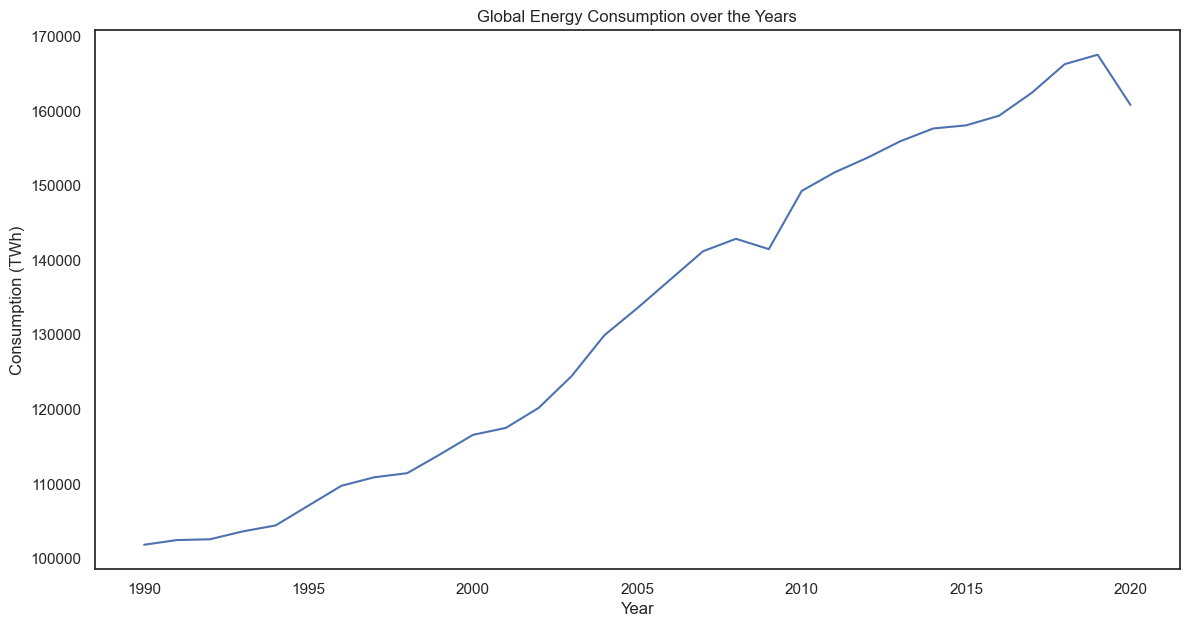

In [18]:
plt.figure(figsize=(14,7))
plt.plot(continent_consumption["Year"], continent_consumption["World"])
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)')
plt.title('Global Energy Consumption over the Years')
plt.show()

The graph shows a continuous increase in global energy consumption from 1990 to 2020, with a rapid rise in the early 2000s and a slight dip in 2020, possibly due to the economic impact of the COVID-19 pandemic. This trend underscores the world's growing energy demands and highlights the need for sustainable energy.

**Global energy consumption decomposed**

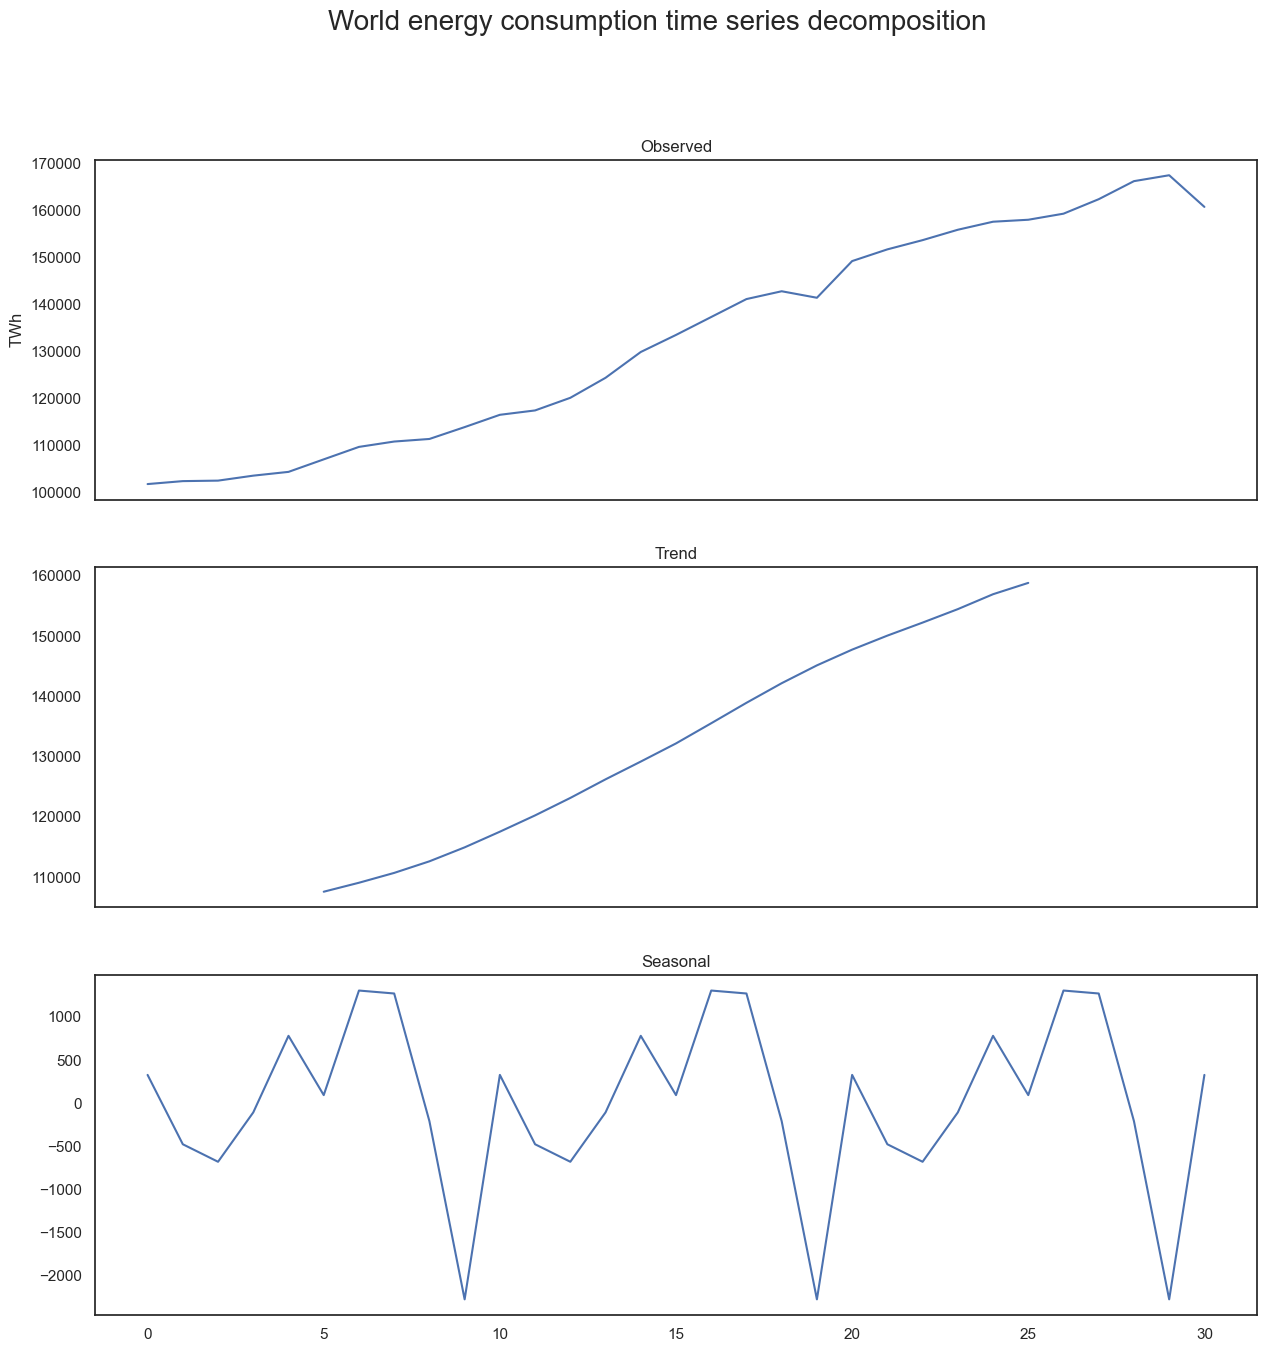

In [19]:
decompose_wec = seasonal.seasonal_decompose(continent_consumption.World, period=10)
_, axc = plt.subplots(3, 1, figsize=(15, 15), sharex=True) 
plt.suptitle('World energy consumption time series decomposition', fontsize=20)
decompose_wec.observed.plot(ax=axc[0], title='Observed')
decompose_wec.trend.plot(ax=axc[1], title='Trend')
decompose_wec.seasonal.plot(ax=axc[2], title='Seasonal')
axc[0].set_ylabel('TWh')
plt.show()

1. Observed Consumption: The observed graph reveals a progressive rise in energy usage over the years, with some variations that may be attributed to global events impacting the economy.
2. Trend: The trend graph isolates the long-term movement from the observed data, smoothing out irregularities and seasonal changes. It shows a clear and steady increase in energy consumption over time.
3. Seasonal: The seasonal graph illustrates recurring fluctuations within a set period, likely annually. These variations point to seasonal shifts in energy demand, possibly due to heating and cooling needs or periodic changes in industrial activities.

The analysis indicates a continuous growth in global energy consumption, with regular seasonal patterns superimposed upon an upward trend, underscoring the world's escalating demand for energy.

**Energy consumed by different continents from 1990 to 2020**

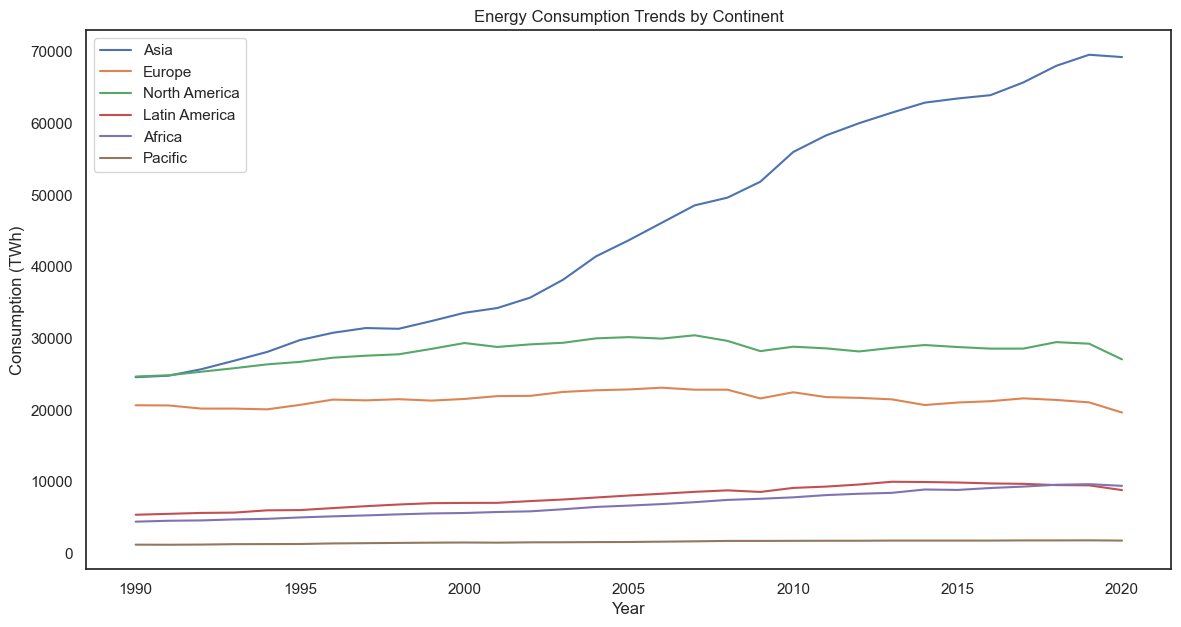

In [20]:
# Assuming the 'continent_consumption' DataFrame has a 'Year' column and consumption data for each continent
plt.figure(figsize=(14, 7))

# Plotting consumption trend for each continent
for continent in cont.columns[1:]:  # Skipping 'Year' and 'World' columns
    plt.plot(cont['Year'], cont[continent], label=continent)

plt.title('Energy Consumption Trends by Continent')
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)')
plt.legend()
plt.show()


Asia has the highest energy consumption and fastest growth rate in consumption in the time period. In contrast, Europe and North America's consumption has plateaued, reflecting energy efficiency gains. Latin America and Africa are on a modest rise, suggesting expanding energy access. The Pacific region's energy use remains the lowest and relatively constant, likely due to smaller populations and industrial activity. These patterns underscore the varied energy trajectories of different continents, with Asia as the primary growth driver.

**Energy consumed by different countries from 1990 to 2020**

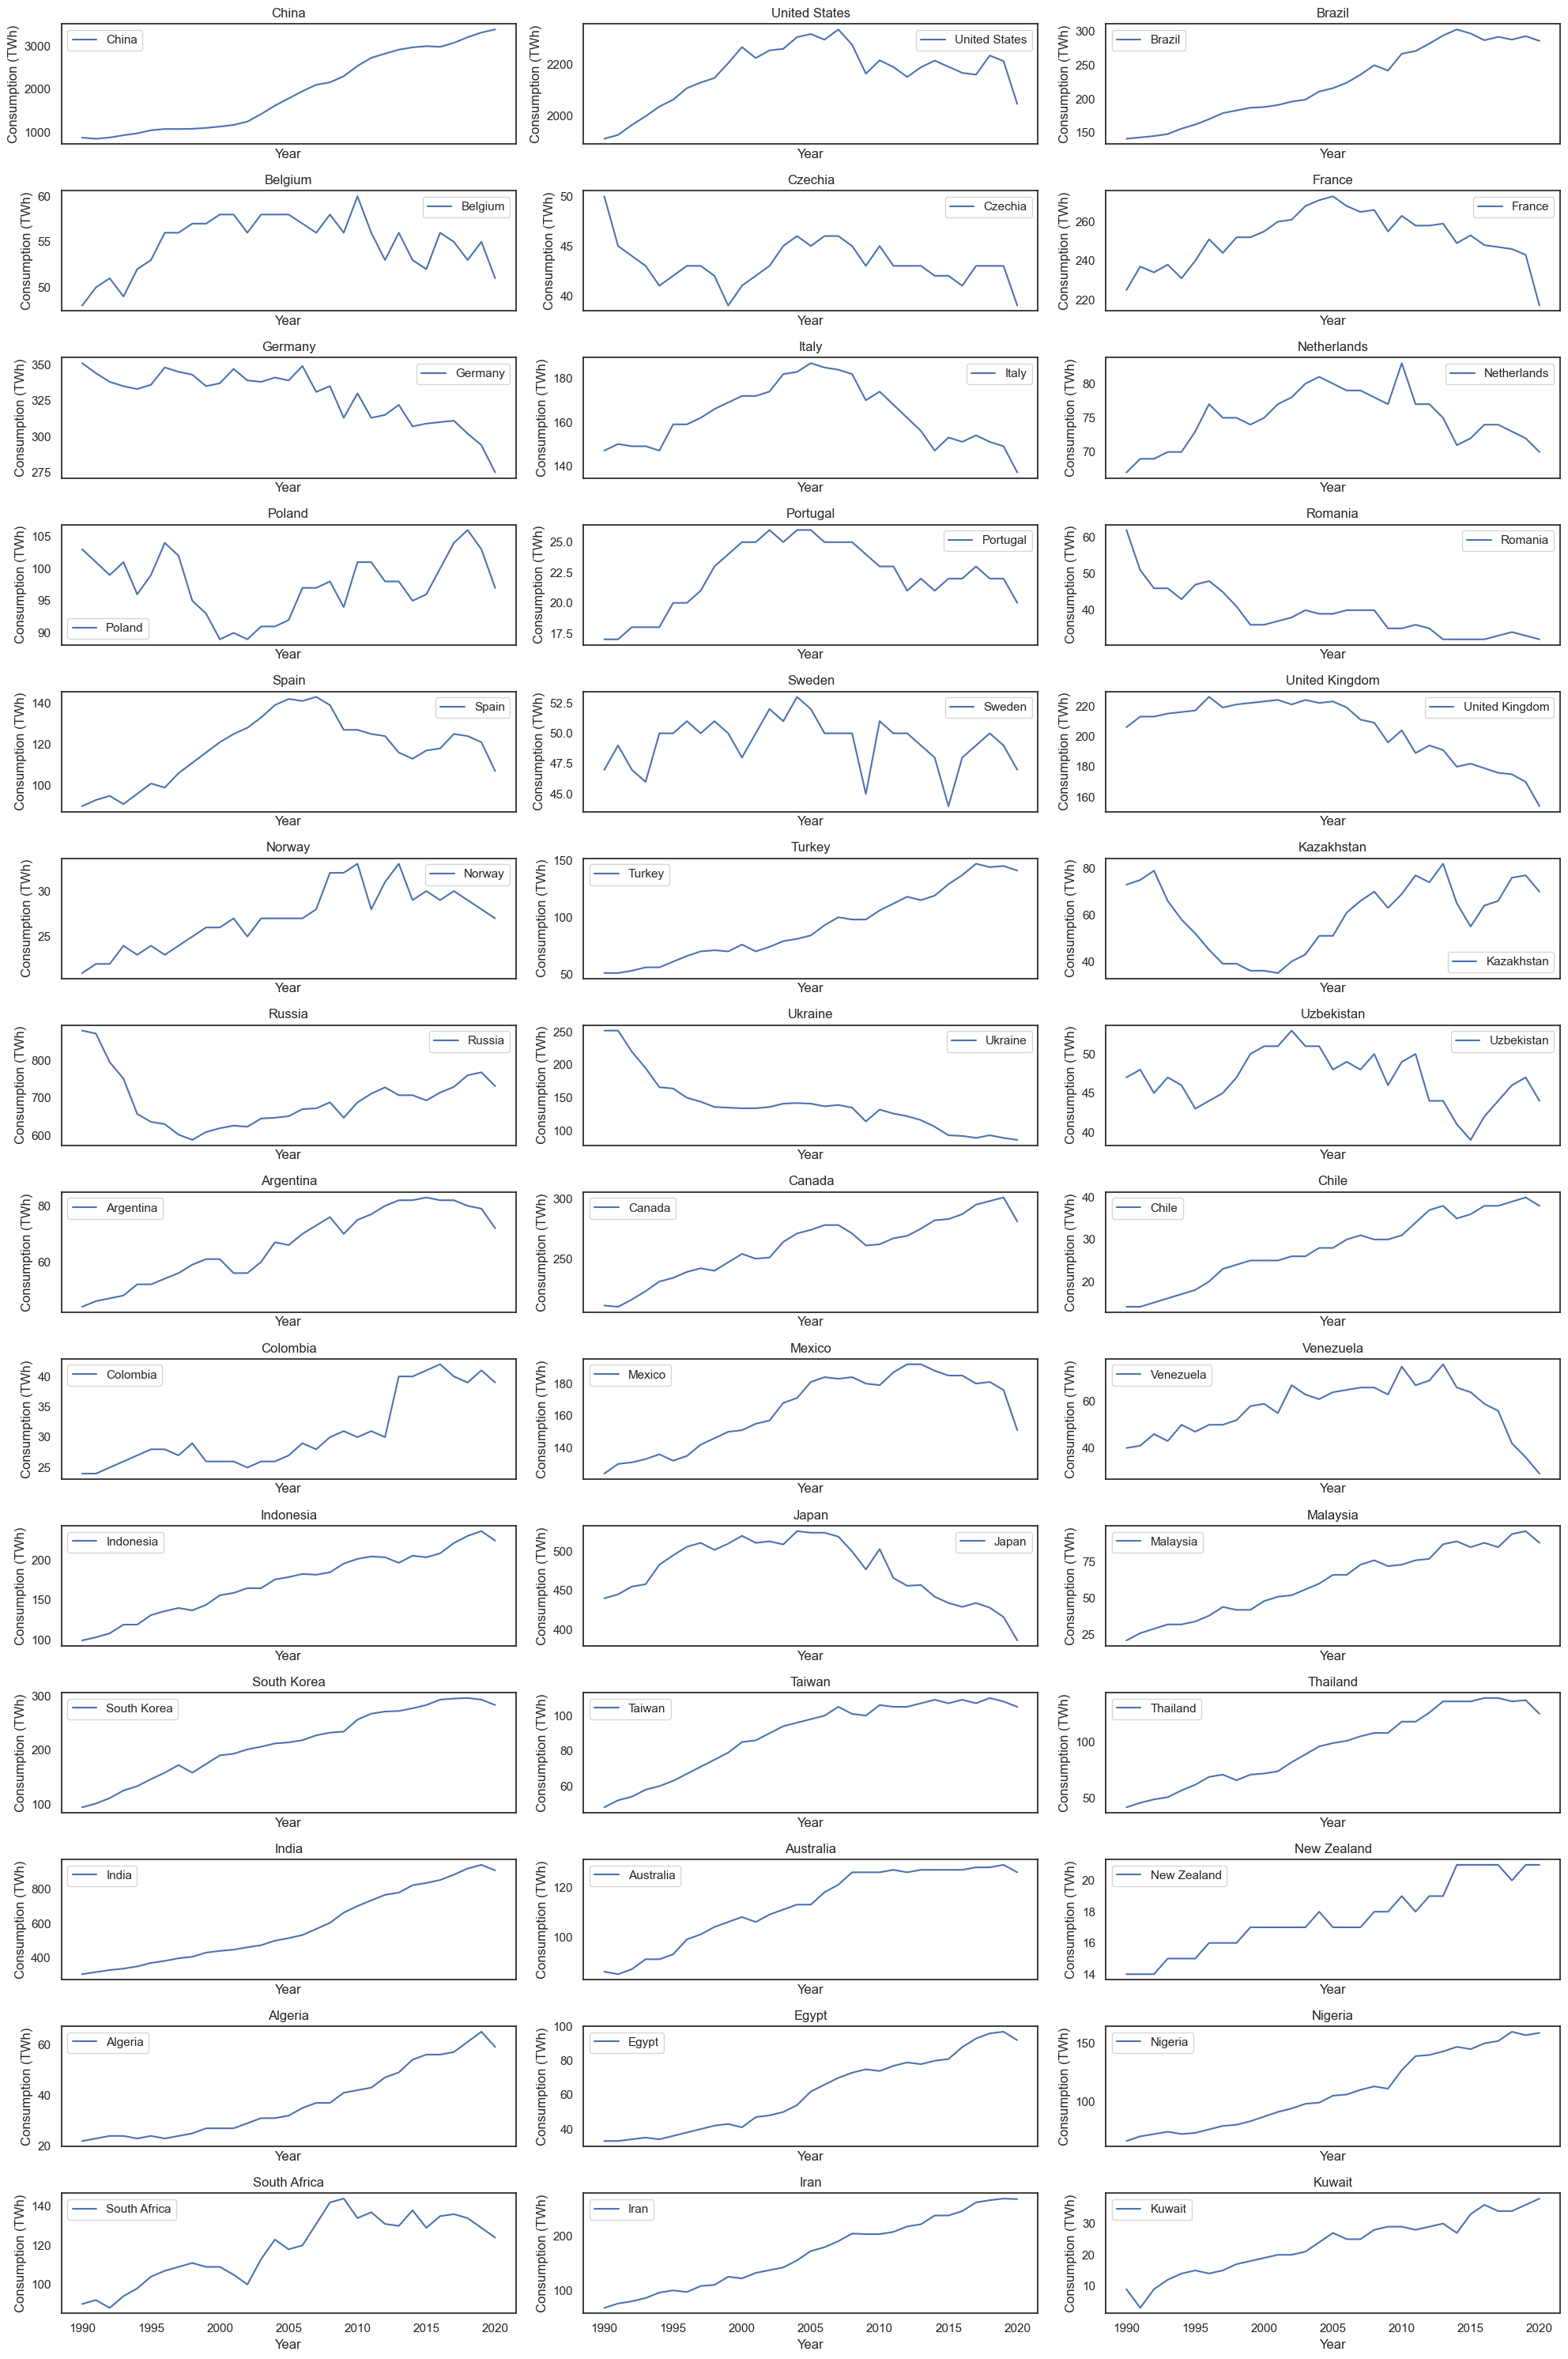

In [21]:
# Number of subplots
n_subplots = 42
fig, axes = plt.subplots(n_subplots // 3, 3, figsize=(20, 30), sharex=True)
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plotting the first n_subplots countries (excluding the 'Year' column)
for idx, column in enumerate(country_consumption.columns[1:n_subplots+1]):
    axes[idx].plot(years, country_consumption[column], label=column)
    axes[idx].set_title(column)
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Consumption (TWh)')
    axes[idx].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The graphs display varying energy consumption patterns: China and India exhibit notable increases. The United States and Brazil have a steady rise, while European nations like Germany and the United Kingdom show fluctuating or stabilizing consumption. Russia and Canada's energy use varies considerably. South Korea and Australia's consumption is consistently rising. Overall, there's a mix of steady increases, stability, and significant variability in energy consumption across different countries.

**Bar plot for Energy Consumption by Country in 2020**

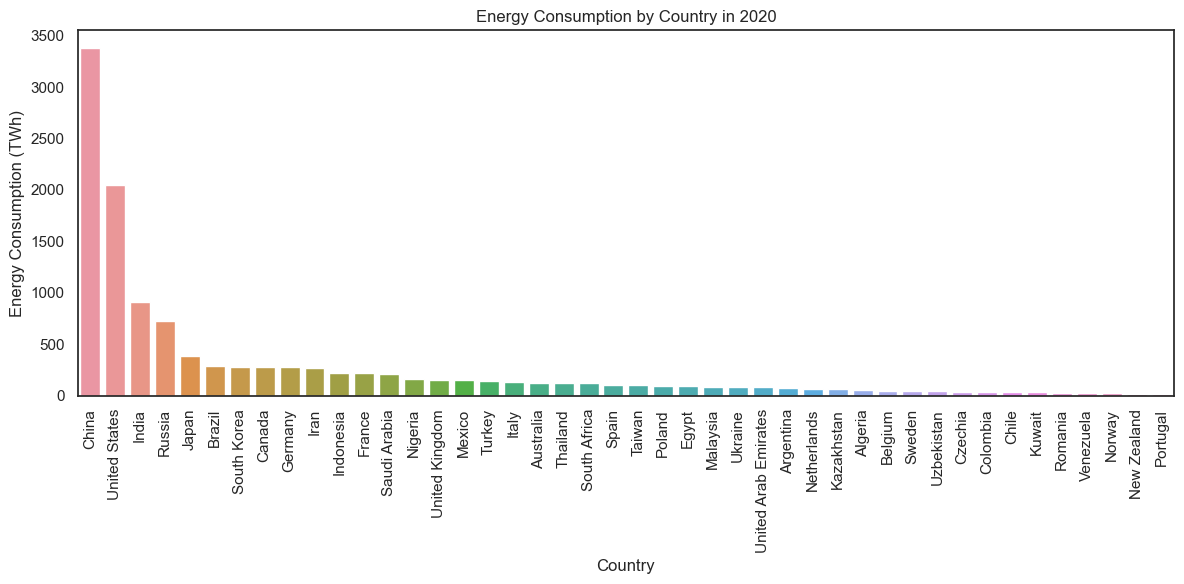

In [22]:
# Plotting
plt.figure(figsize=(12, 6))
sb.barplot(x = data_2020.index, y = data_2020['Consumption'])
plt.xticks(rotation=90)  # Rotate the country names for better readability
plt.xlabel('Country')
plt.ylabel('Energy Consumption (TWh)')
plt.title('Energy Consumption by Country in 2020')
plt.tight_layout()  # Adjust layout to make room for country labels
plt.show()


China leads by a significant margin, followed by the United States and India. There's a notable drop in consumption from these top consumers to the next tier of countries like Russia and Japan. As we move further down the list, countries like Germany, Brazil, and South Korea show relatively moderate consumption levels. The graph tails off with several countries, including Kuwait, New Zealand, and Portugal, indicating much lower energy use.

## Renewable Energy Production

In [23]:
def renewable_sort_display(df,col):
    df = df.sort_values(by=[col],ascending = False)
    plt.xticks(rotation=90)
    sb.barplot(data=df,x=df['Country'],y=df[col])

**Bar Chart for countries producing Biofuel**

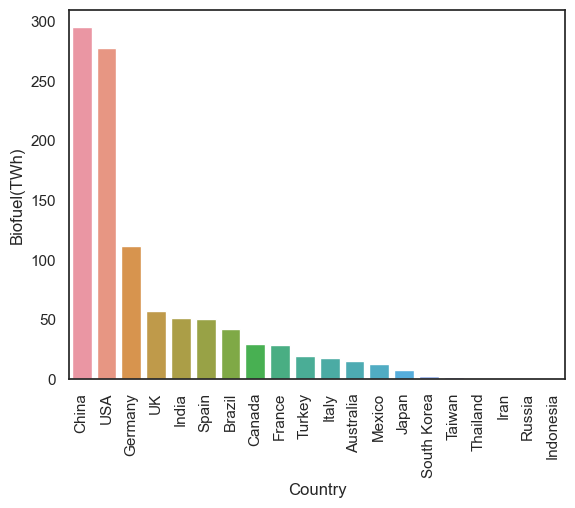

In [24]:
renewable_sort_display(top20,'Biofuel(TWh)')

**Bar Chart for countries producing Solar Power**

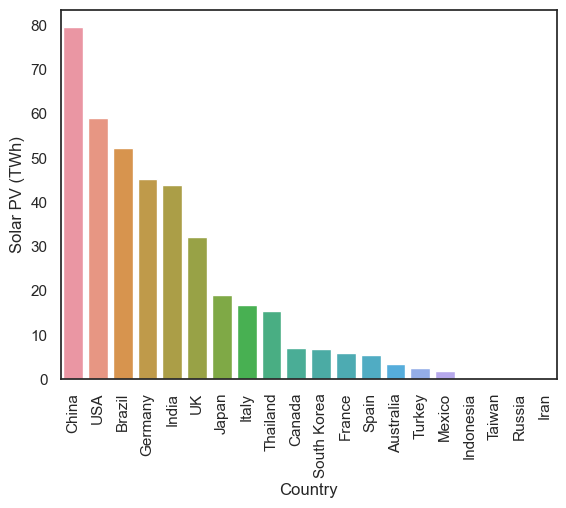

In [25]:
renewable_sort_display(top20,'Solar PV (TWh)')

**Bar Chart for countries producing Geothermal Energy**

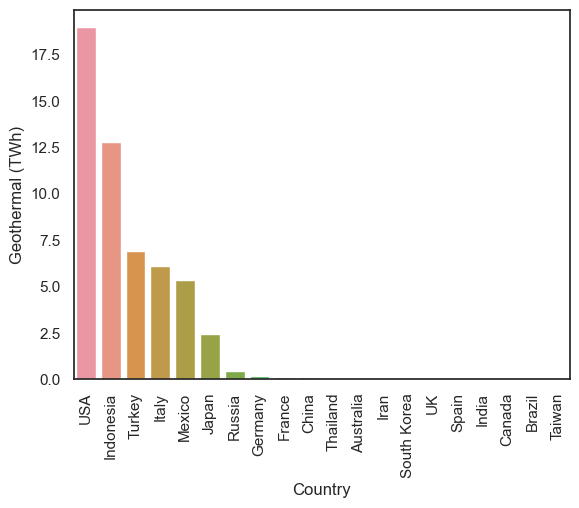

In [26]:
renewable_sort_display(top20,'Geothermal (TWh)')

**Bar Chart for countries producing Hydro Energy**

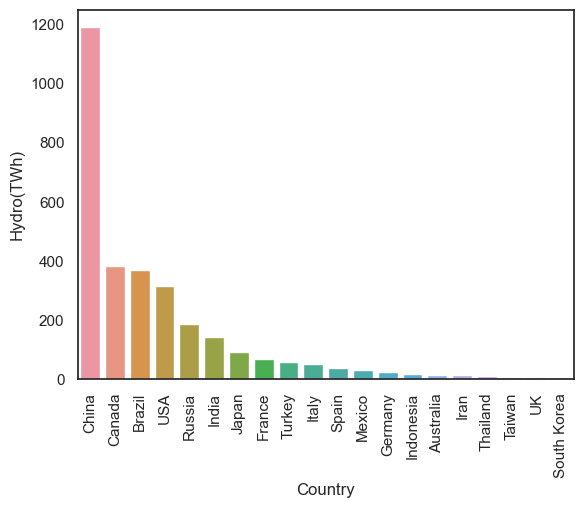

In [27]:
renewable_sort_display(top20,'Hydro(TWh)')

**Bar Chart for countries producing Total Renewable Energy**

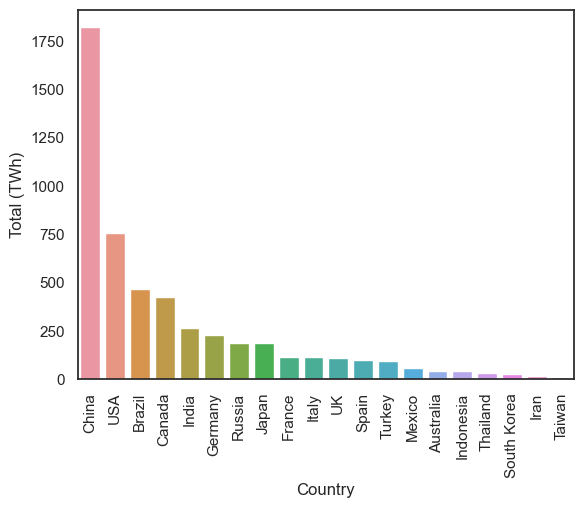

In [28]:
renewable_sort_display(top20,'Total (TWh)')

Overall from the Bar Charts, we can see that China is the leader in Renewable Energy Production globally by a huge margin. China is followed by the USA, Brazil, Canada and India in total renewable energy generation globally.

**Boxplot for different types of Renewable Energy being produced**

Hydro(TWh)             Axes(0.125,0.11;0.133621x0.77)
Biofuel(TWh)        Axes(0.285345,0.11;0.133621x0.77)
Solar PV (TWh)       Axes(0.44569,0.11;0.133621x0.77)
Geothermal (TWh)    Axes(0.606034,0.11;0.133621x0.77)
Total (TWh)         Axes(0.766379,0.11;0.133621x0.77)
dtype: object

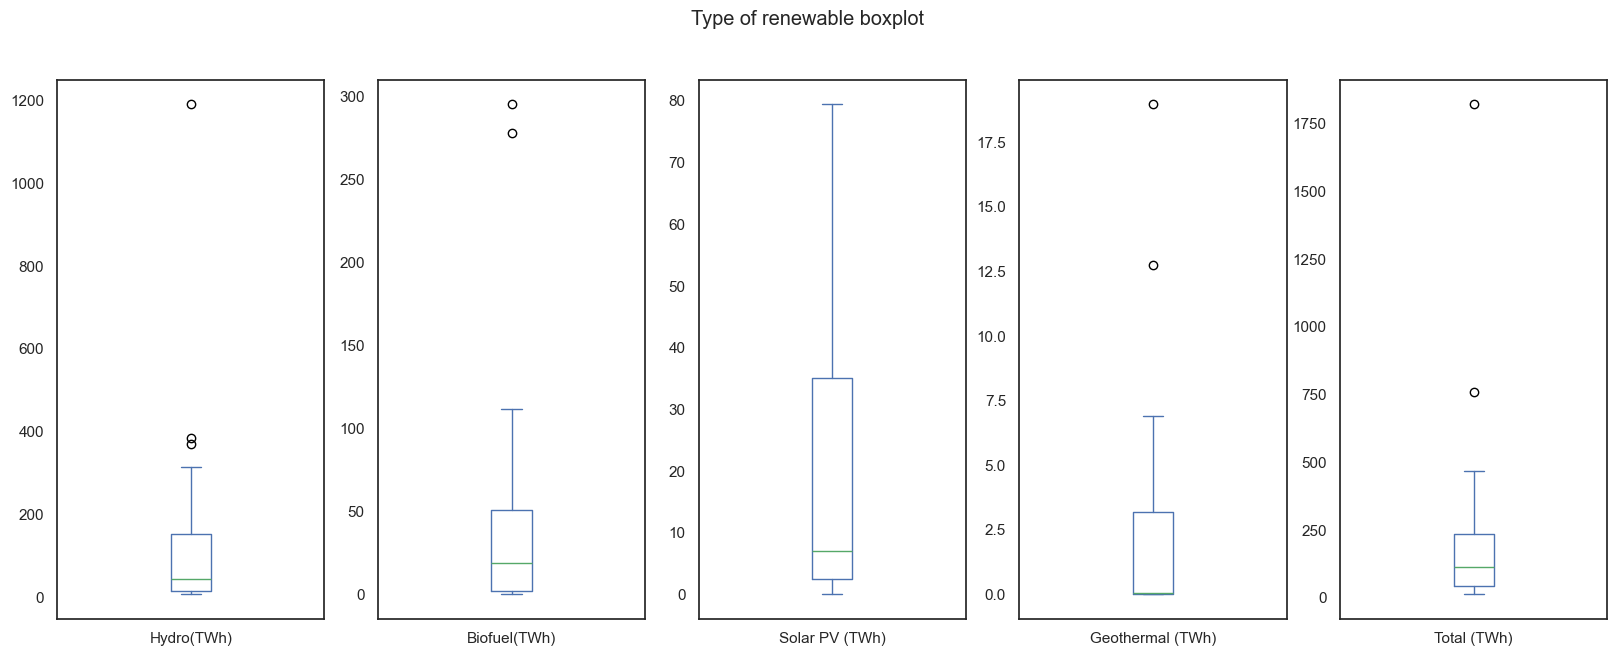

In [29]:
top20.plot.box(subplots=True, figsize=(20,7), title='Type of renewable boxplot')

1. **Hydro Energy** has the highest median production among the individual types of renewable energy shown, with a substantial range and some outliers indicating years with significantly higher production.
2. **Biofuel Energy** production has a lower median than Hydro, but still shows a reasonable range of values with a few outliers.
3. **Solar PV energy** production has the lowest median, which suggests it's less produced compared to Hydro and Biofuel. However, there's a wide range between the first and third quartiles, indicating variability in production over the years. There are also outliers suggesting occasional high production values.
4. **Geothermal Energy** production displays a very tight interquartile range around the median, indicating consistent production amounts over time with a few outliers.
5. **The Total Renewable Energy** production combines all types and therefore has a much higher median than the individual categories. The range is wide, and several outliers indicate years with particularly high total renewable energy production.

Overall, this visualization indicates that hydro power is currently a leading source among those listed, while solar PV shows growth potential despite its lower median production value. The data also underscores the reliability and consistency of geothermal production.

**Total Renewable Energy Production from 1990-2017**

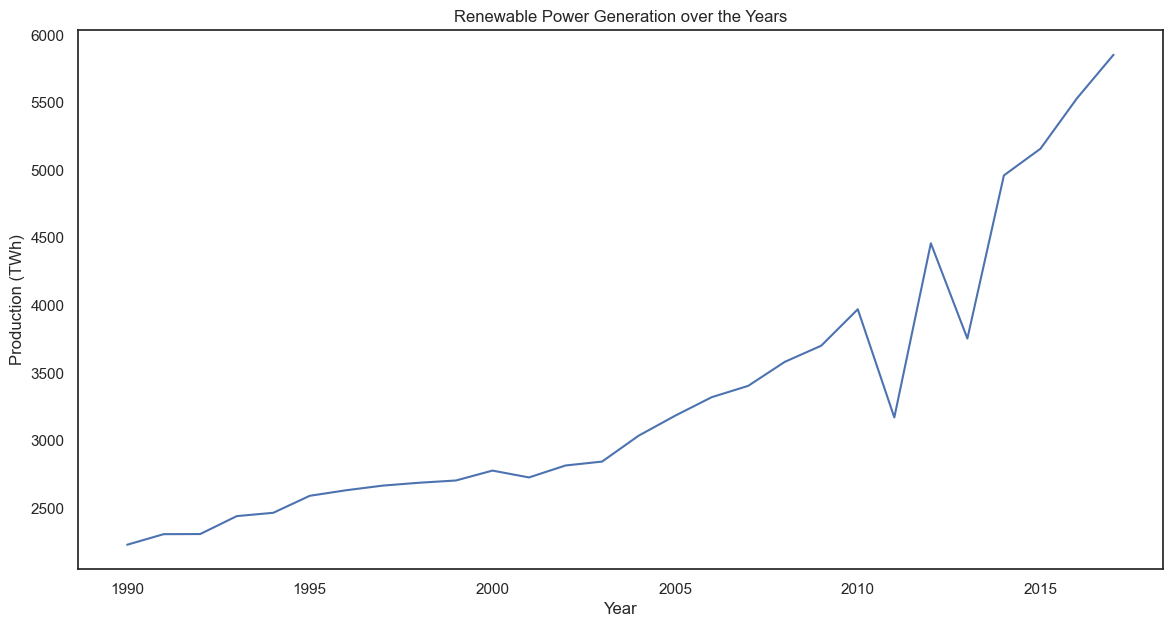

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(renewable_power_gen["Year"], renewable_power_gen["Total (TWh)"])
plt.xlabel('Year')
plt.ylabel('Production (TWh)')
plt.title('Renewable Power Generation over the Years')
plt.show()

The graph shows an increasing trend in renewable energy production from 1990 onwards. Early years show modest growth, with a flat progression. Post-2000, production rises sharply. The most recent years show a steep increase, indicating a surge in renewable energy adoption. Sharp fluctuations suggest variability due to unknown factors like policy changes, economic factors, or resource availability.

**Renewable Energy Production from 1990-2017 by category**

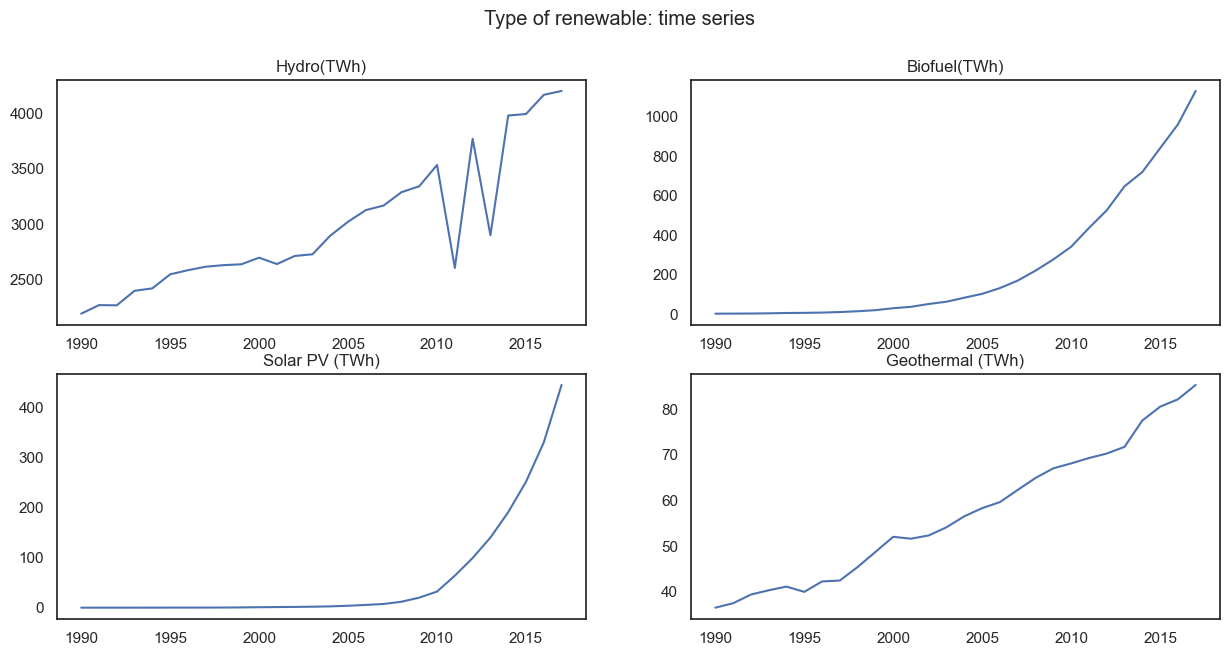

In [31]:
f,axes = plt.subplots(2,2, figsize = (15,7))
plt.suptitle('Type of renewable: time series')
axes[0][0].plot(renewable_power_gen['Year'], renewable_power_gen['Hydro(TWh)'])
axes[0][0].set_title('Hydro(TWh)')
axes[0][1].plot(renewable_power_gen['Year'], renewable_power_gen['Biofuel(TWh)'])
axes[0][1].set_title('Biofuel(TWh)')
axes[1][0].plot(renewable_power_gen['Year'], renewable_power_gen['Solar PV (TWh)'])
axes[1][0].set_title('Solar PV (TWh)')
axes[1][1].plot(renewable_power_gen['Year'], renewable_power_gen['Geothermal (TWh)'])
axes[1][1].set_title('Geothermal (TWh)')
plt.show()

1. **Hydro**: Shows gradual growth until around 2005, then more variability but still an upward trend.
2. **Biofuel**: Exhibits a slow increase until the early 2000s, followed by exponential growth.
3. **Solar PV**: Starts with very low production, negligible growth until around 2005, then a sharp exponential increase.
4. **Geothermal**: There is a steady, consistent growth throughout the period.

Overall, The graphs depict a growth in renewable energy, with a sharp increase in solar power and steady rises in others.




**Percentage Change by which Renewable Energy is being produced from 1990-2017**

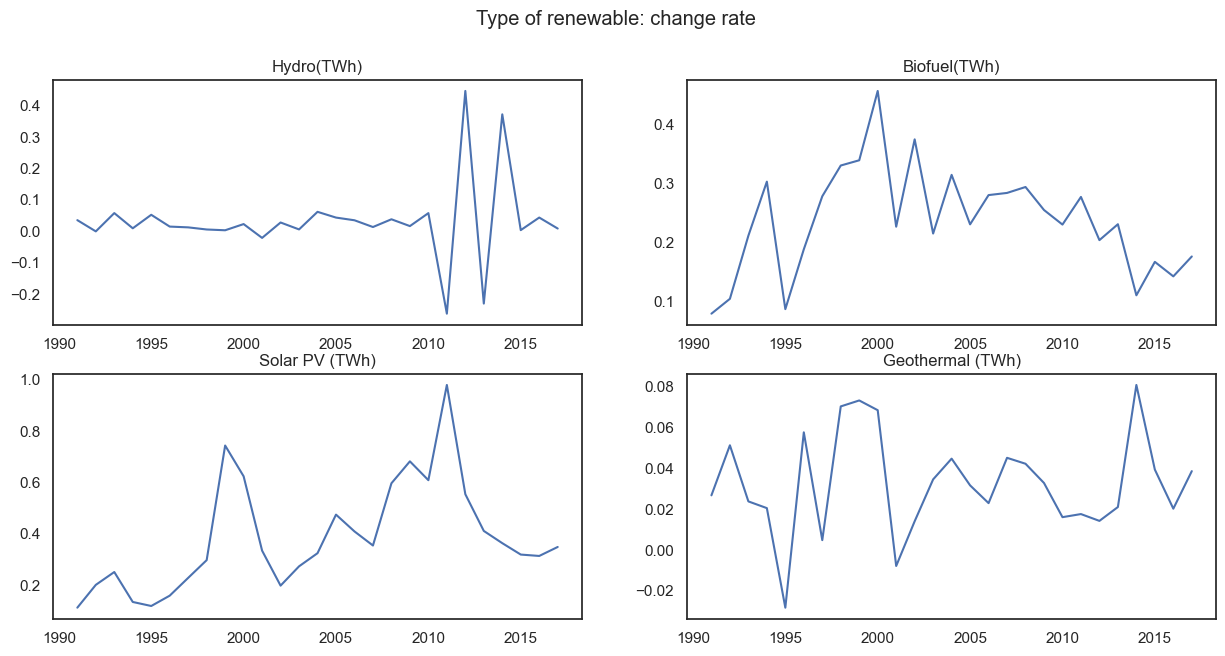

In [32]:
totalpower = renewable_power_gen.set_index('Year')
growth = totalpower.pct_change()
f,axes = plt.subplots(2,2, figsize = (15,7))
plt.suptitle('Type of renewable: change rate')
axes[0][0].plot(growth.index, growth['Hydro(TWh)'])
axes[0][0].set_title('Hydro(TWh)')
axes[0][1].plot(growth.index, growth['Biofuel(TWh)'])
axes[0][1].set_title('Biofuel(TWh)')
axes[1][0].plot(growth.index, growth['Solar PV (TWh)'])
axes[1][0].set_title('Solar PV (TWh)')
axes[1][1].plot(growth.index, growth['Geothermal (TWh)'])
axes[1][1].set_title('Geothermal (TWh)')
plt.show()

1. **Hydro**: Exhibits minor fluctuations around zero, with a few notable spikes and dips, suggesting overall stability with occasional significant changes in production rate.
2. **Biofuel**: Shows an increasing trend in change rate until about 2010, with some variability, then a declining trend, indicating a slow-down in growth rate.
3. **Solar PV**: Has low initial change rates, a significant spike around the mid-2000s, then fluctuates increasingly, suggesting rapid and volatile growth periods.
4. **Geothermal**: Displays low and steady rates with some variability but no clear long-term trend, implying consistent but modest growth.

The graphs show fluctuating growth rates in renewable energy, with notable spikes in solar PV and overall stability in hydro production.





## Renewable vs Non Renewable sources

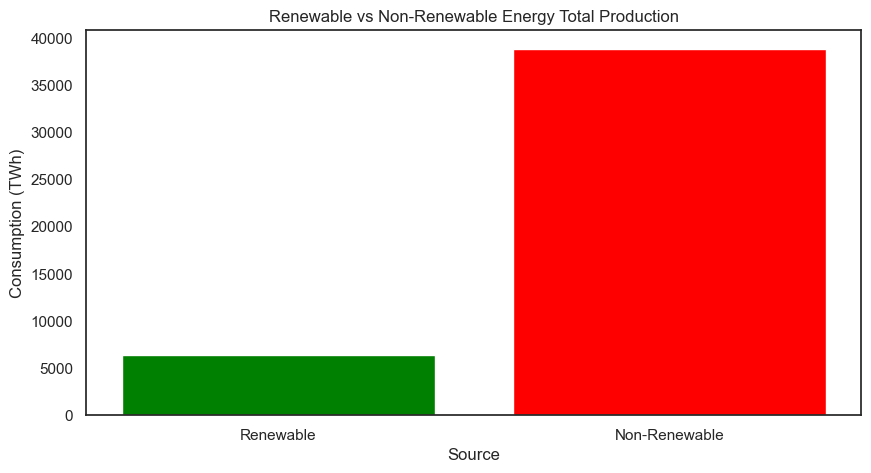

In [33]:
re_vs_nonre = {}
re_vs_nonre['Renewable'] = renewable_total.iloc[8]['Contribution (TWh)']
re_vs_nonre['Non-Renewable'] = nonrenewable_power_gen['Contribution (TWh)'].sum()
sources = list(re_vs_nonre.keys())
energy_prod = list(re_vs_nonre.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(sources, energy_prod, color=['green','red'])

plt.xlabel("Source")
plt.ylabel("Consumption (TWh)")
plt.title("Renewable vs Non-Renewable Energy Total Production")

plt.show()

It is evident that non-renewable energy production is significantly higher than that of renewable energy. The vast difference highlights the current dependency on non-renewable sources. The relatively small bar for renewable energy suggests that there is potential for growth and a need for increased adoption of renewable sources to transition towards a more sustainable energy mix. This disparity also underscores the challenges faced in reducing reliance on non-renewable energy sources.

## Renewable Energy Production and Global Consumption

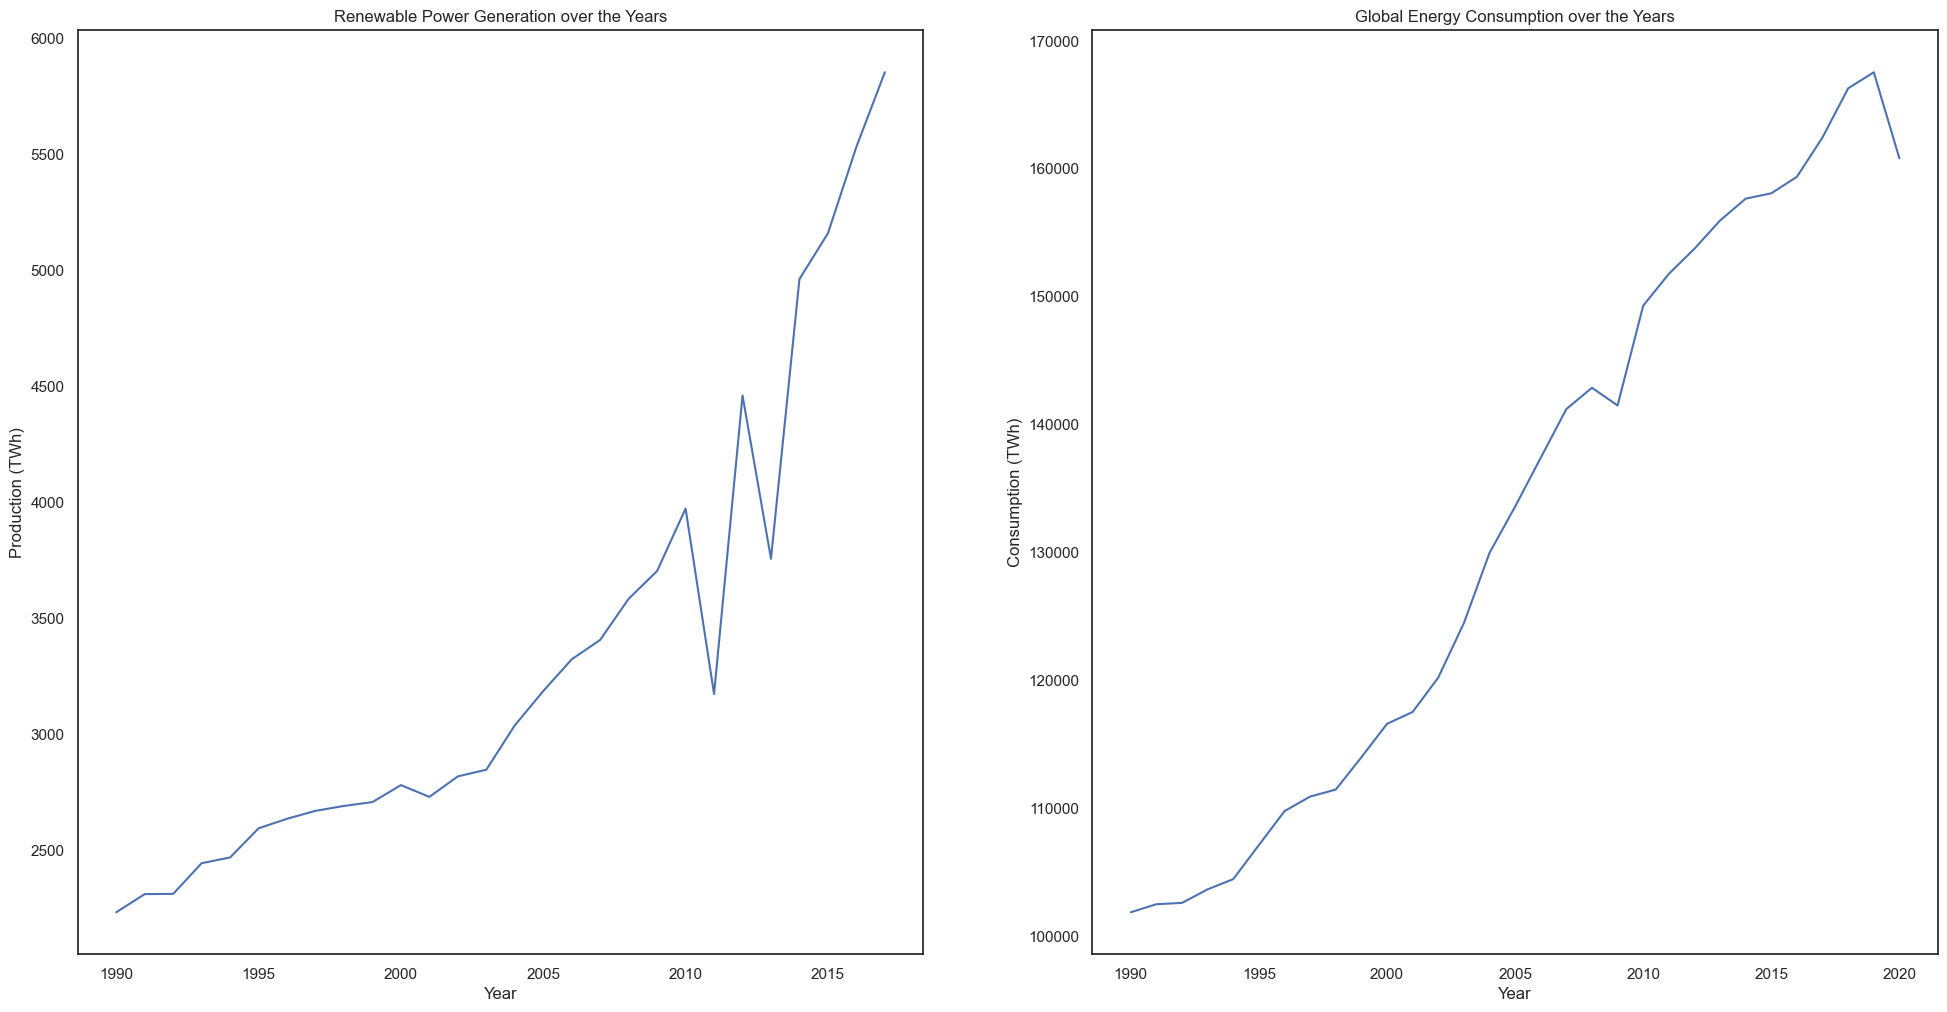

In [34]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].plot(renewable_power_gen["Year"], renewable_power_gen["Total (TWh)"])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Production (TWh)')
axes[0].set_title('Renewable Power Generation over the Years')

axes[1].plot(continent_consumption["Year"], continent_consumption["World"])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Consumption (TWh)')
axes[1].set_title('Global Energy Consumption over the Years')

plt.show()

Comparing both graphs suggests that while there is growth in renewable energy production, it may not be keeping pace with the overall rise in energy consumption. The rate of growth for renewables needs to accelerate even further to match or overtake the pace of the increase in global energy consumption.

In [35]:
jointdf = pd.merge(renewable_power_gen, continent_consumption, on="Year")
jointdf.set_index("Year",inplace=True)
jointdf = jointdf[['Total (TWh)', 'World']]
jointdf.rename(columns = {"Total (TWh)": "RenewableGeneration", "World":"GlobalConsumption"}, inplace = True)
jointdf.corr()

,RenewableGeneration,GlobalConsumption
RenewableGeneration,1.000000,0.897565
GlobalConsumption,0.897565,1.000000


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


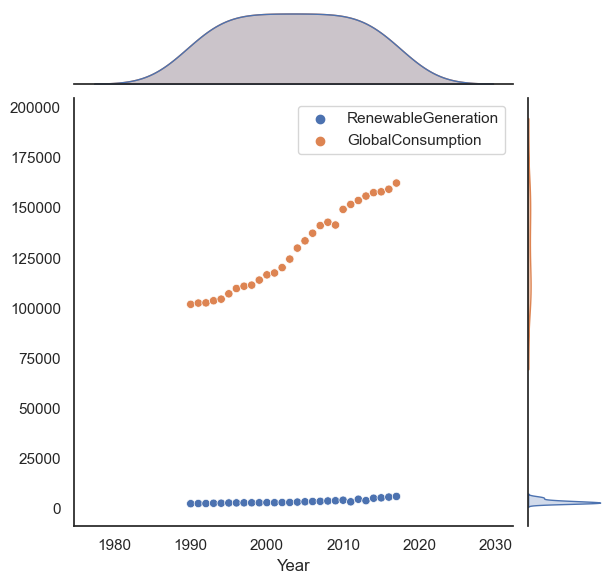

In [36]:
sb.jointplot(data = jointdf)

1. Renewable Generation is relatively low compared to Global Consumption, staying mostly flat.
2. Global Consumption displays a steep increase, suggesting that overall energy consumption has risen significantly over the same period.
3. The frequency distribution for Global Consumption is heavily skewed towards the latter years, indicating most of the consumption has occurred more recently.
4. The frequency distribution for Renewable Generation indicates that it has remained quite low throughout the period, without the same upward trend seen in Global Consumption.
5. The Scatter Plot suggests that there's a relationship between time and both variables, with Global Consumption increasing at a much faster rate than Renewable Generation. Both variables have a high positive correlation.

The chart suggests that while renewable energy generation is present, it is not keeping pace with the rapid growth of global energy consumption, highlighting a significant gap between the generation of renewable energy and overall energy consumption.

## Share of renewable energy in 2017

In [37]:
proportion = (jointdf['RenewableGeneration']/jointdf['GlobalConsumption'])*100;
proportion.loc[2017]

3.6030463474982413

Therefore, renewable energy sources accounted for approximately **3.60%** of the total global energy consumption in the year 2017.

The proportion of renewable energy in the global mix is relatively small, highlighting the dominance of non-renewable energy sources.
Given the urgent need for carbon reduction to combat climate change, the 3.60% indicates that there is substantial room for growth in the renewable energy sector.

Tracking the trend from this point onward can help understand the pace of transition towards renewables and inform whether additional measures are necessary to accelerate the shift.

The insight is particularly relevant for energy policymakers, environmental advocates, and investors in the energy sector, as it underscores the scale of the challenge and opportunity in expanding renewable energy.



